In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
plt.style.use('fivethirtyeight')

In [3]:
train=pd.read_csv("train_cleaned2.csv",index_col='Unnamed: 0')
test=pd.read_csv("test_cleaned.csv",index_col='Unnamed: 0')
answer_test = pd.read_csv("gender_submission.csv")

In [4]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,0.0,1.0,0.346569,0.125,0.333333,0.045771,0.0,0.0,1.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


In [5]:
answer_test.shape

(418, 2)

<AxesSubplot:>

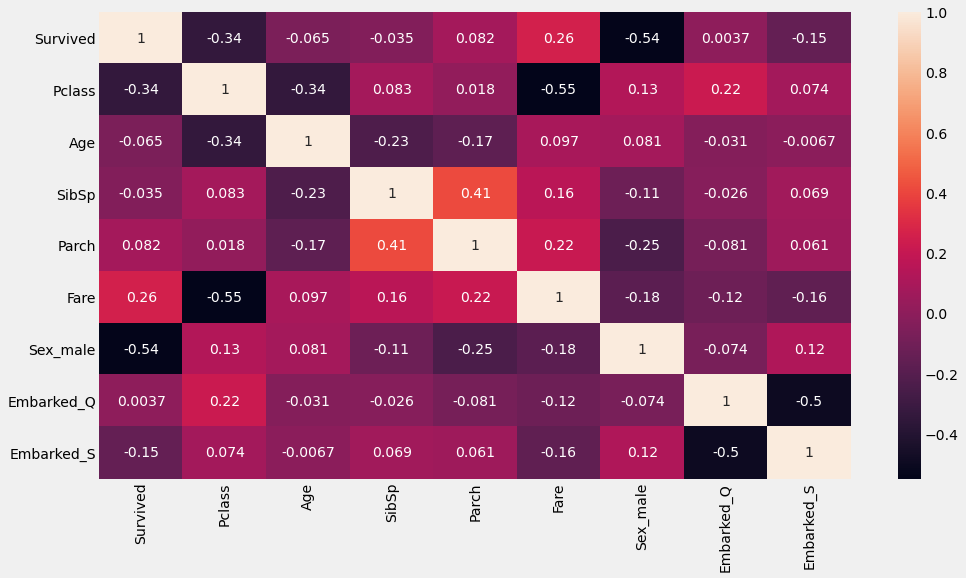

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True)

In [43]:
X= train.drop('Survived',axis=1)
y=train['Survived']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [10]:
y_train

575    0.0
5      0.0
716    1.0
755    1.0
196    0.0
      ... 
741    0.0
579    1.0
365    0.0
203    0.0
413    0.0
Name: Survived, Length: 801, dtype: float64

In [53]:
from sklearn.model_selection import cross_val_score,KFold
kfold= KFold(n_splits=10)

# Logestic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
logistic_Regression_model= LogisticRegression()
logistic_Regression_model.fit(X_train,y_train)
y_pred =logistic_Regression_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7666666666666667


In [47]:
val_score=cross_val_score(LogisticRegression(),X,y,cv=10,scoring='roc_auc_ovo')
val_score.mean()

0.8527158984806043

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(n_estimators=150)
random_forest_model.fit(X_train,y_train)

y_pred =random_forest_model.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.8171641791044776


In [57]:
random_forest_model= RandomForestClassifier(n_estimators=150)
val_score=cross_val_score(RandomForestClassifier(),X,y,cv=kfold,scoring='roc_auc_ovo')
val_score.mean()

0.8569488590251846

# Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

gaussian_naive_bayes= GaussianNB()
gaussian_naive_bayes.fit(X_train,y_train)
y_pred=gaussian_naive_bayes.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8059701492537313


In [59]:
val_score=cross_val_score(GaussianNB(),X,y,cv=kfold,scoring='roc_auc_ovo')
val_score.mean()

0.8253366379037932

In [70]:
from sklearn.svm import SVC

svc= SVC(probability=True)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8134328358208955


In [99]:
val_score=cross_val_score(SVC(probability=True),X,y,cv=10,scoring='roc_auc_ovo')
val_score.mean()

0.8420251817898876

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8022388059701493


In [87]:
val_score=cross_val_score(KNeighborsClassifier(n_neighbors=40),X,y,cv=10,scoring='roc_auc_ovo')
val_score.mean()

0.8528975186034009

In [88]:
from sklearn.linear_model import SGDClassifier
sgd =SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

0.8057784911717496

In [93]:
val_score=cross_val_score(SGDClassifier(max_iter=5, loss='log'),X,y,cv=10,scoring='roc_auc_ovo')
val_score.mean()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before converge

0.8343235152646917

# XGBOOST

In [104]:
from xgboost import XGBClassifier
val_score=cross_val_score(XGBClassifier(),X,y,cv=10,scoring='roc_auc_ovo')
val_score.mean()

0.8561116204057381

In [157]:
from sklearn.ensemble import BaggingClassifier
val_score=cross_val_score(BaggingClassifier(),X,y,cv=10,scoring='roc_auc_ovo')
val_score.mean()

0.847393175451999

# Hyperparamete tunning

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# KNN

In [101]:
leaf_size = list(range(1,30))
n_neighbors = list(range(1,40))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10,scoring='roc_auc_ovo')
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 7
Best p: 2
Best n_neighbors: 19


In [102]:
best_model.best_score_

0.8616719010836658

# XGBOOST

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Various learning rate parameters
learning_rate=['0.05','0.1','0.2','0.3','0.5','0.6']

#Maximum number of levels in tree
max_depth=[int(i) for i in np.linspace(5,30,num=6)]

## max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]

## Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [107]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [159]:
#Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator =XGBClassifier(),
                               param_distributions = random_grid,
                               scoring='roc_auc_ovo', 
                               n_iter = 100,
                               cv = 5, 
                               verbose=2,
                               random_state=42,
                               n_jobs = 1)
xg_random.fit(X,y)

KeyboardInterrupt: 

In [117]:
xg_random.best_score_

0.8787068329888434

# Random Forest

In [212]:
param={'criterion':['gini','entropy'],
            "min_samples_split":[2,4,6,10,12,16,18,20,32],
            "max_depth":[int(x) for x in np.linspace(100,1200,100)],
            "max_features":['auto','sqrt','log2'],
            "n_estimators":[int(x) for x in np.linspace(100,1200,100)],
            "min_samples_leaf" : [1, 5, 10, 25, 50, 70]
           }

In [214]:
from sklearn.model_selection import RandomizedSearchCV

model= RandomizedSearchCV(random_forest_model,param_distributions=param,scoring='roc_auc_ovo',
                         cv=10,
                         random_state=42,
                        n_iter=10)
y_pred=model.fit(X,y)

In [215]:
model.best_score_

0.868035537447302

# Final Submission 

In [134]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.873482,0.386231,-0.499470,-0.400248,-0.497413,0.755929,2.843757,-1.350676
1,0.873482,1.371370,0.616992,-0.400248,-0.512278,-1.322876,-0.351647,0.740370
2,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,0.755929,2.843757,-1.350676
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,0.755929,-0.351647,0.740370
4,0.873482,-0.598908,0.616992,0.619896,-0.417492,-1.322876,-0.351647,0.740370
...,...,...,...,...,...,...,...,...
413,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,0.755929,-0.351647,0.740370
414,-1.505120,0.740881,-0.499470,-0.400248,1.314435,-1.322876,-0.351647,-1.350676
415,0.873482,0.701476,-0.499470,-0.400248,-0.507796,0.755929,-0.351647,0.740370
416,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,0.755929,-0.351647,0.740370


In [200]:
y_pred=clf.predict(test)

In [201]:
accuracy_score(answer_test['Survived'],y_pred)

0.8851674641148325

In [202]:
y_pred

array([0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [203]:
sub_df=pd.read_csv('gender_submission.csv')

In [204]:
dataset= pd.DataFrame(zip(passengerId,y_pred),columns=['PassengerId','Survived'])

In [205]:
dataset

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [206]:
dataset.to_csv("sample_submission.csv",index=False)

In [207]:
import pickle
pickle_out = open("titanic_knn.pickle","wb")
pickle.dump(clf, pickle_out)

In [208]:
final = pd.read_csv('sample_submission.csv')

In [209]:
final

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
